In [1]:
import kagglehub
path = kagglehub.dataset_download("rahmasleam/breast-cancer")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\mszcz\.cache\kagglehub\datasets\rahmasleam\breast-cancer\versions\1


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay,PrecisionRecallDisplay
from sklearn.metrics import r2_score,classification_report,ConfusionMatrixDisplay

In [3]:
df = pd.read_csv(r'C:\Users\mszcz\.cache\kagglehub\datasets\rahmasleam\breast-cancer\versions\1\breast-cancer.csv')
pd.set_option('display.max_columns',32)
df = df.drop('id',axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df['diagnosis']=df['diagnosis'].map({'M':1,
                     'B':0})

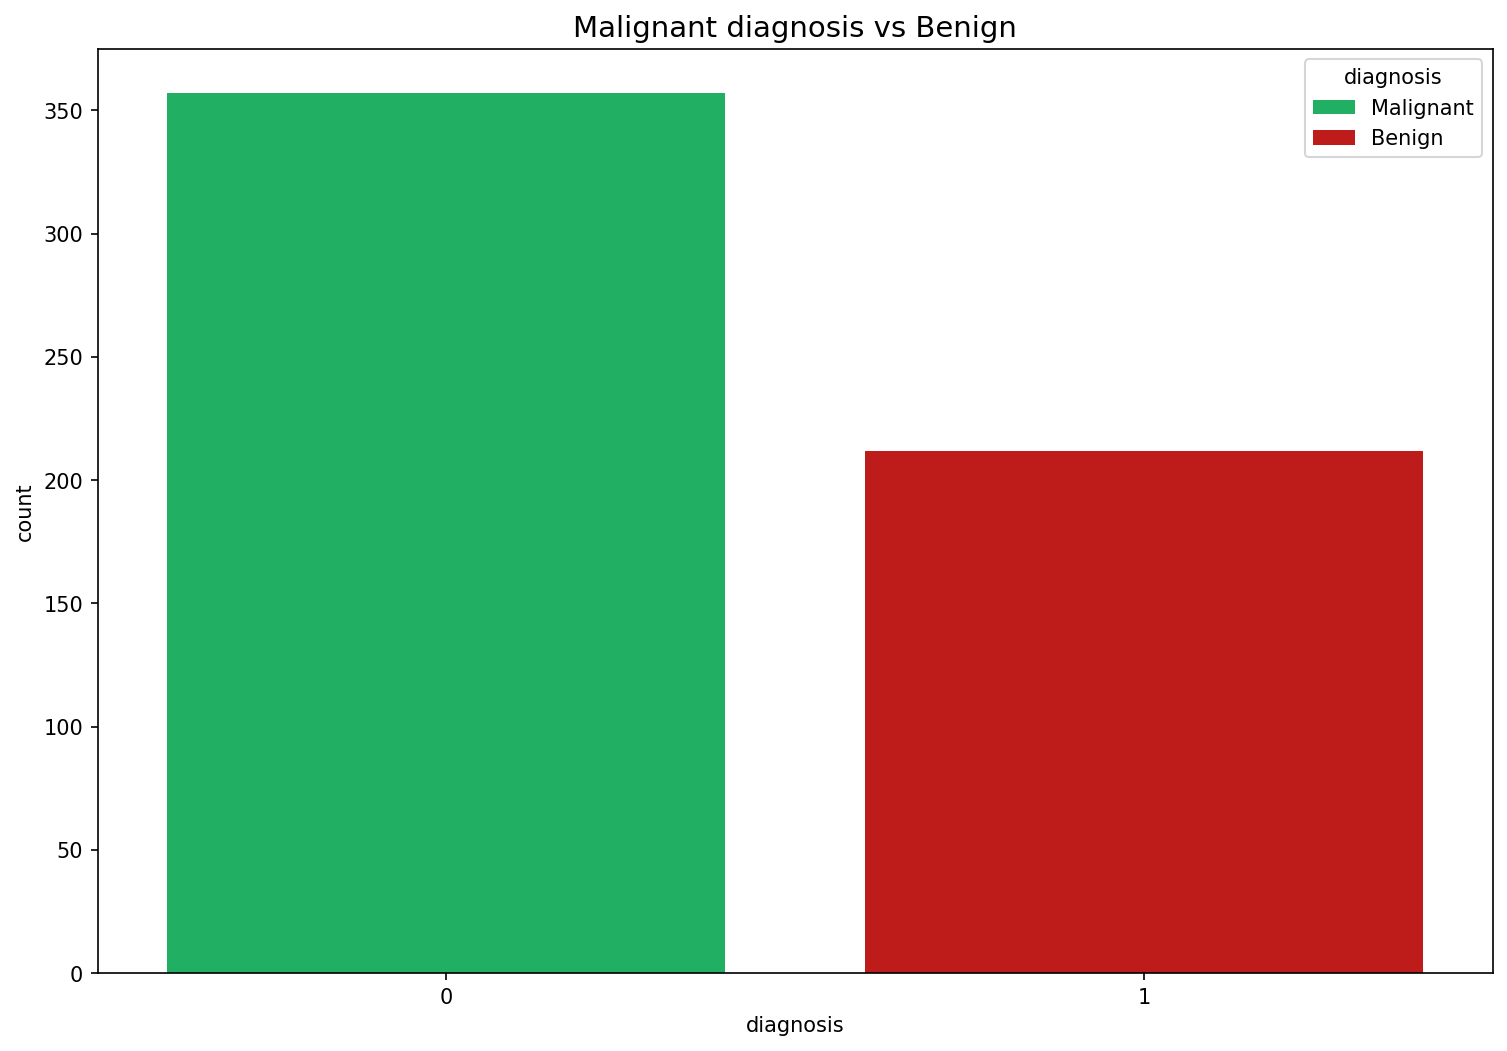

In [8]:
plt.figure(figsize=(12,8),dpi=150)
col_map = {1:'#d90000',
           0:'#08c761'}
sns.countplot(data=df,x='diagnosis',hue='diagnosis',palette=col_map)
plt.title('Malignant diagnosis vs Benign',
         fontsize=14)
plt.legend(title='diagnosis',labels=['Malignant','Benign'])

<Axes: xlabel='compactness_mean', ylabel='concavity_mean'>

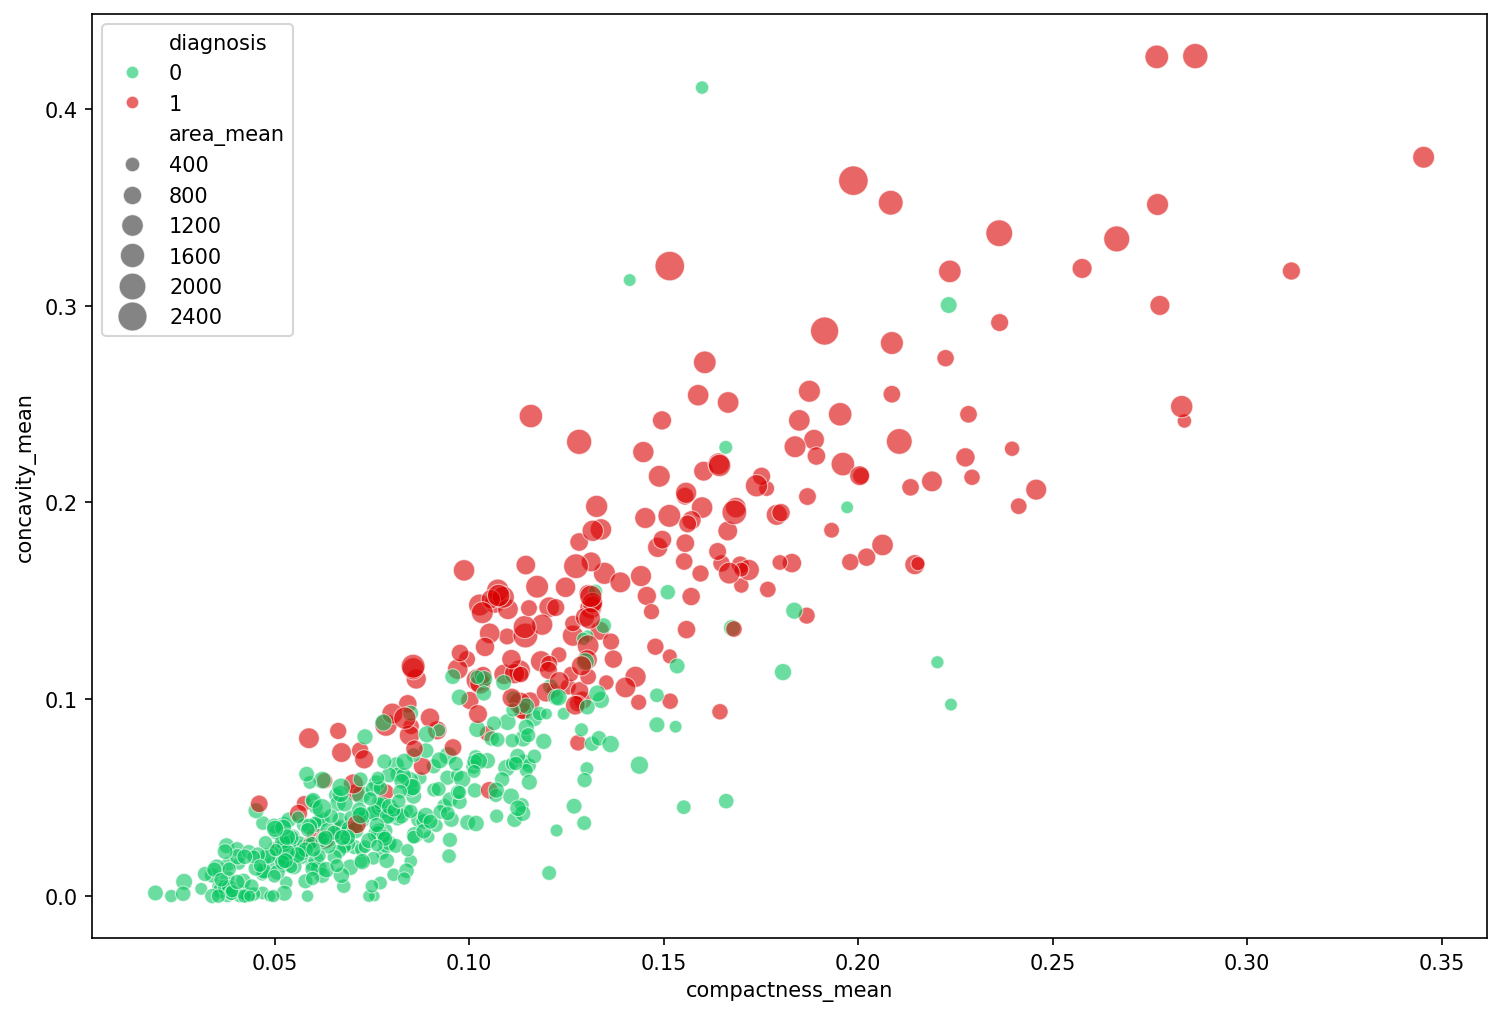

In [9]:
plt.figure(figsize=(12,8),dpi=150)
sns.scatterplot(data=df, x='compactness_mean', y='concavity_mean',
                hue='diagnosis',palette=col_map,
                size='area_mean',sizes=(30, 200),
               alpha=0.6)

concave pooints z teori im więcej tym gorzej

<Axes: xlabel='concavity_mean', ylabel='concave points_mean'>

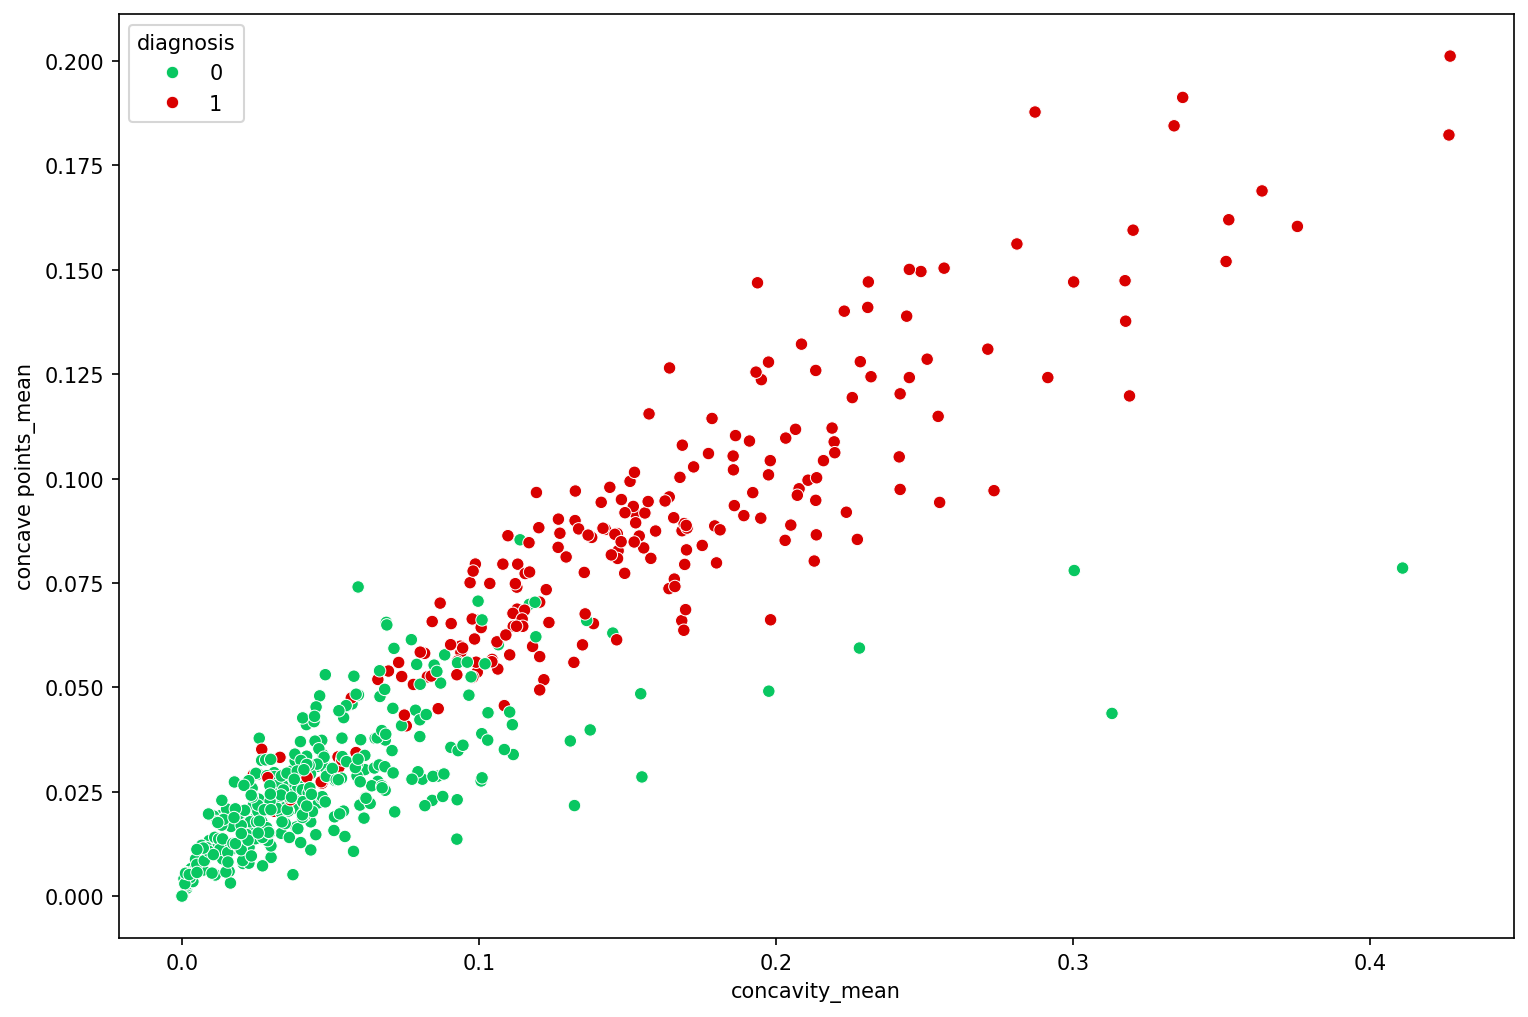

In [10]:
plt.figure(figsize=(12,8),dpi=150)
sns.scatterplot(data=df,x='concavity_mean',y='concave points_mean',
               hue='diagnosis',palette=col_map)


In [11]:
df_means=df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]

<Figure size 1800x1200 with 0 Axes>

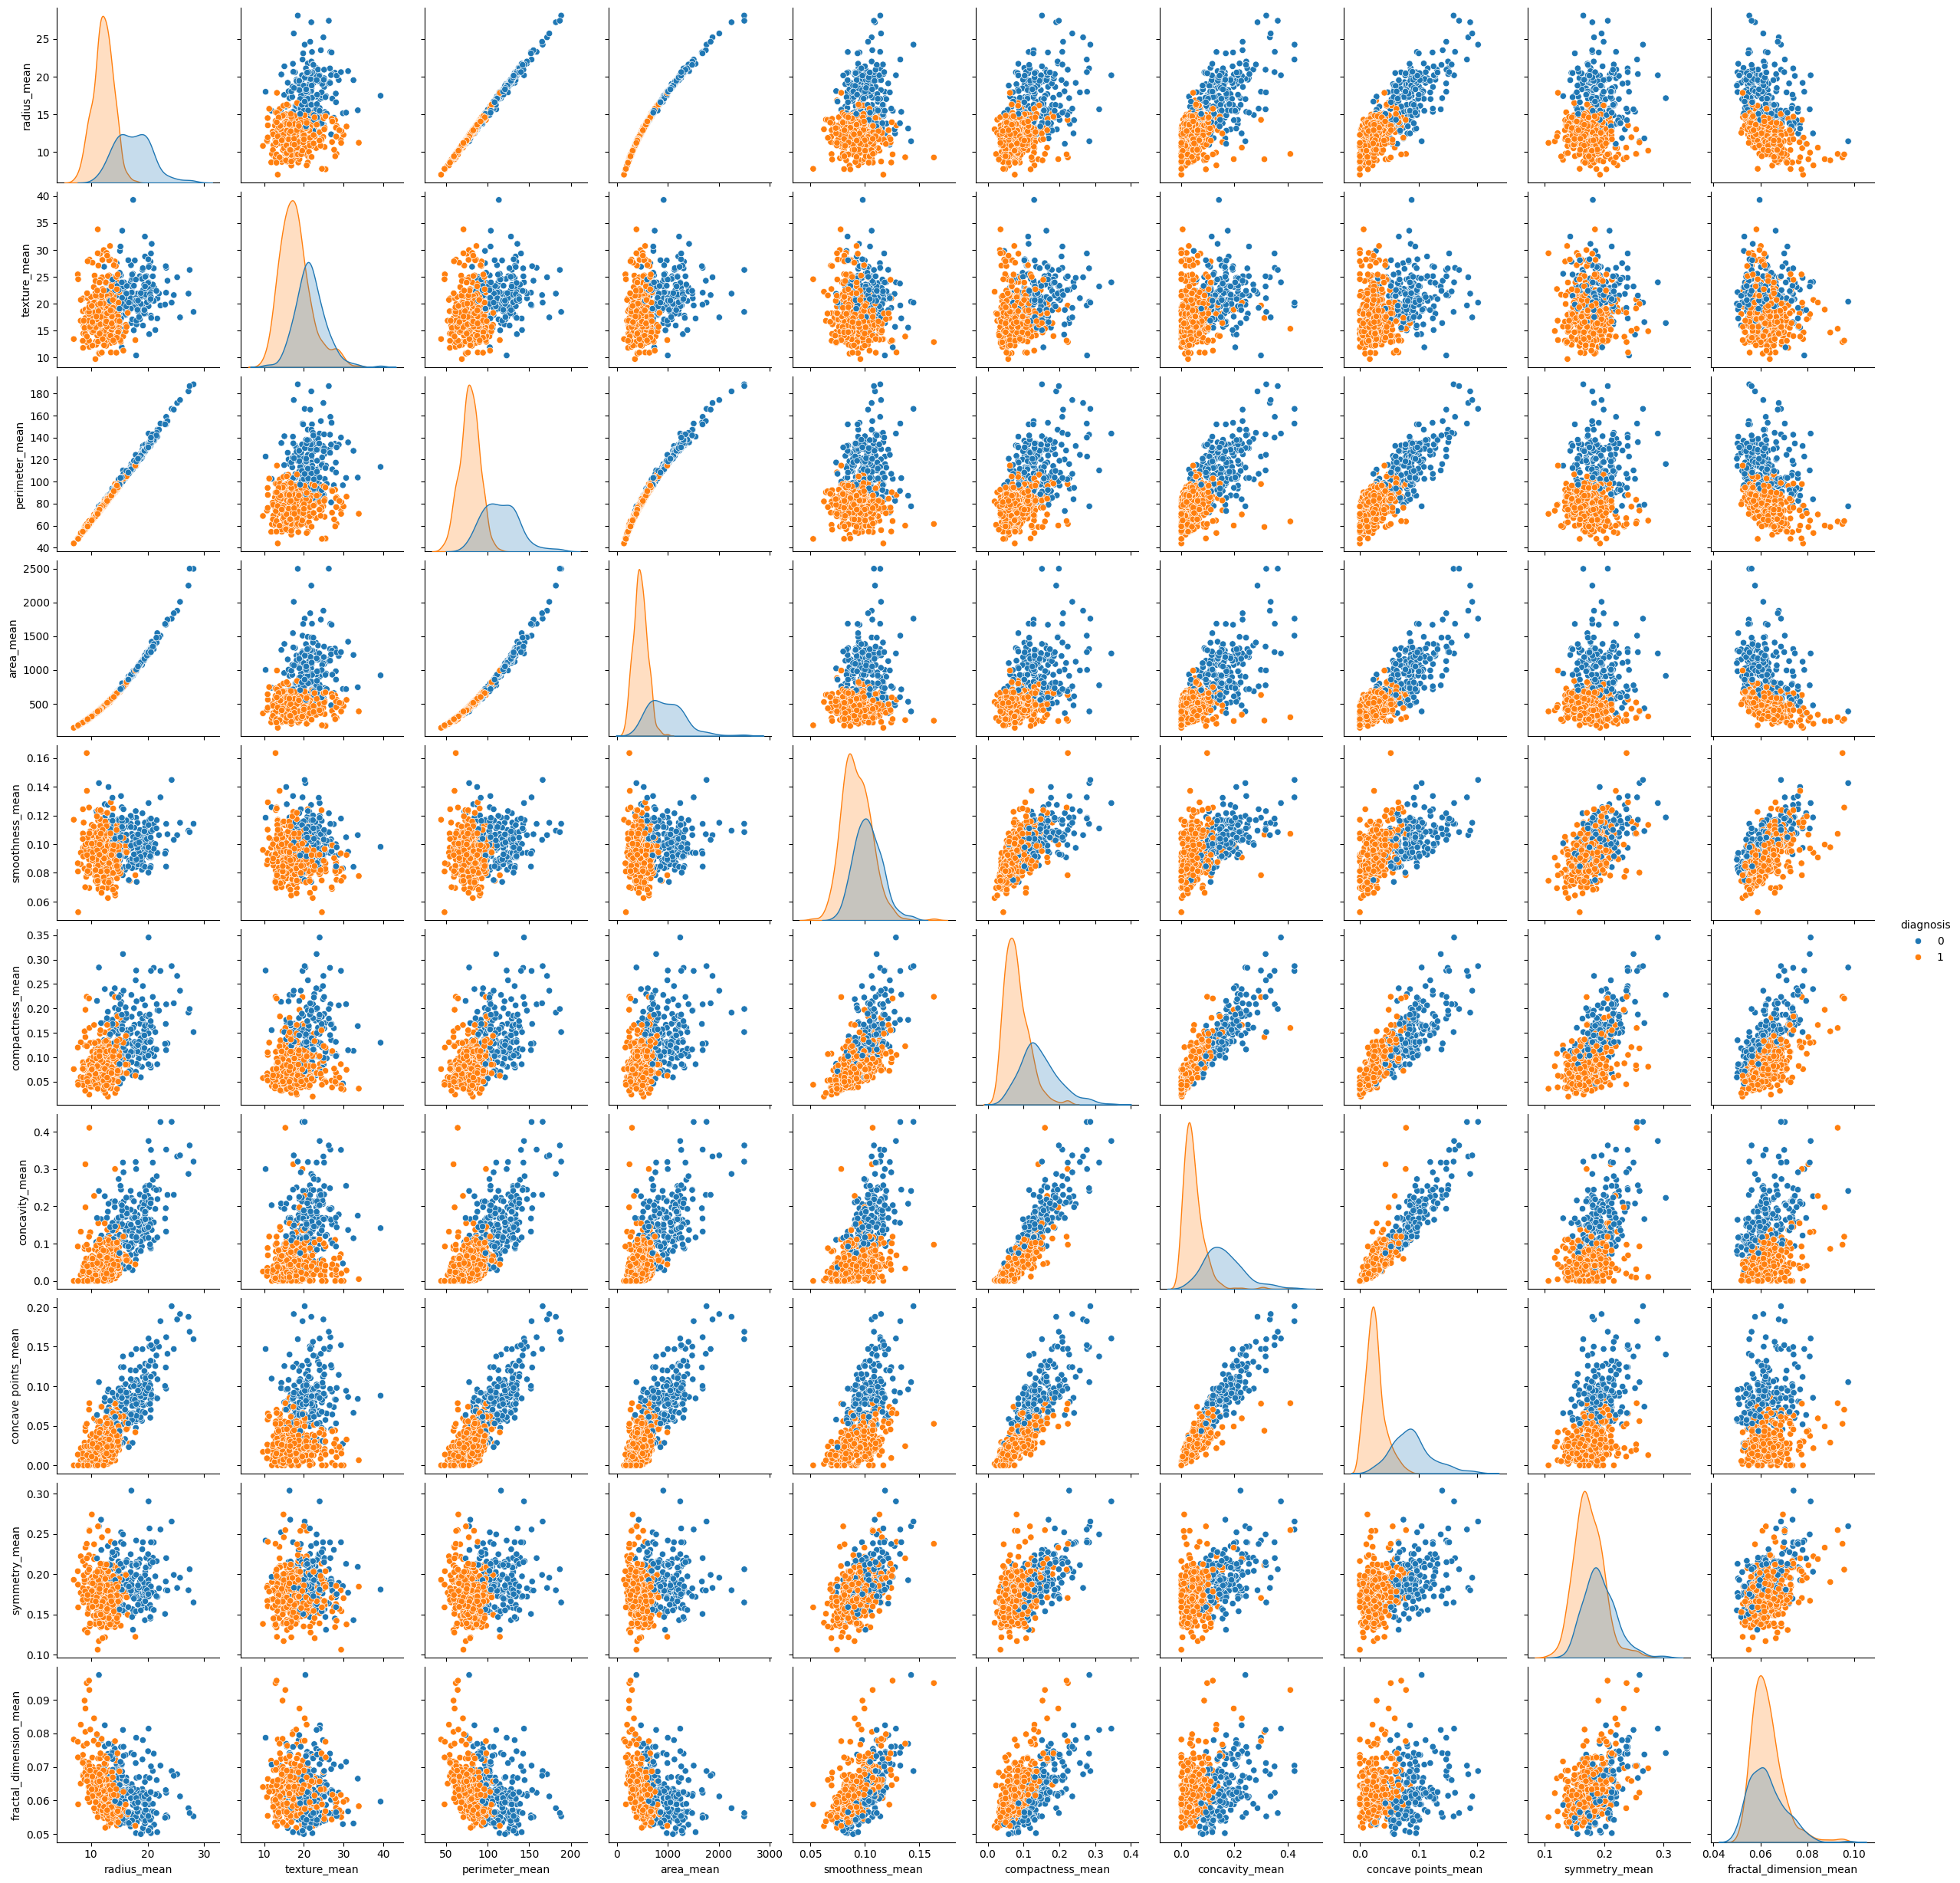

In [51]:
plt.figure(figsize=(12,8),dpi=150)
sns.pairplot(df_means,hue='diagnosis')

In [12]:
df_means=df[['diagnosis','texture_mean','area_mean','smoothness_mean','compactness_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]

<Axes: >

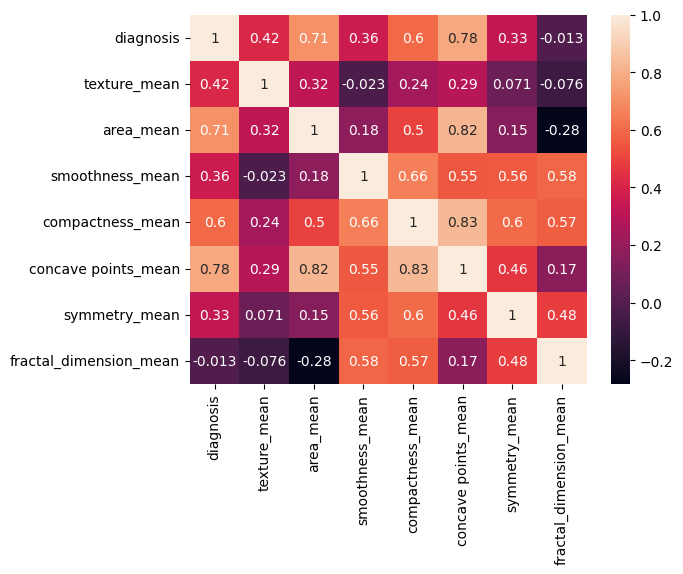

In [13]:
sns.heatmap(df_means.corr(numeric_only=True),annot=True)

I am using random forest classifier so there is no need to drop highly correlated x variables

In [117]:
X = df_means.drop('diagnosis',axis=1)
y = df_means['diagnosis']

In [118]:
X_tr,X_oth,y_tr,y_oth = train_test_split(X,y,test_size=0.3,random_state=101)

In [119]:
X_eval,X_test,y_eval,y_test = train_test_split(X_oth,y_oth,test_size=0.5,random_state=101)

In [124]:
scaler = StandardScaler()
sc_X_tr =scaler.fit_transform(X_tr)
sc_X_test = scaler.transform(X_test)
sc_X_eval = scaler.transform(X_eval)

In [42]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
log_model = LogisticRegression()

In [19]:
svc_model = SVC()

In [20]:
forest_model = RandomForestClassifier()

In [125]:
def run_test_model(model,param_grid):
    mod = GridSearchCV(model,param_grid,n_jobs=-1,verbose=2,scoring='roc_auc')
    mod.fit(sc_X_tr,y_tr)
    y_preds = mod.predict(sc_X_test)
    print(classification_report(y_test,y_preds));
    print(mod.best_params_)
    
    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,10))
    ConfusionMatrixDisplay.from_predictions(y_test, y_preds,ax=ax[1],colorbar=False)
    PrecisionRecallDisplay.from_predictions(y_test,y_preds,ax=ax[0])
    RocCurveDisplay.from_predictions(y_test,y_preds,ax=ax[2])
    plt.tight_layout
    

In [23]:
forest_param_grid = {'n_estimators':[30,50,80,100,150,200],
                     'max_depth':[None,5,10,15,20,25],
                     'min_samples_leaf':[20,30,50],
                     'max_features': ['auto', 'sqrt', 'log2'],
                     'min_samples_split':[2,5,8,10],
                    }

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits


C:\Nowy folder\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3360 fits failed out of a total of 10080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2452 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Nowy folder\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Nowy folder\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Nowy folder\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Nowy folder\lib\site-packages\sklearn\utils\_param_validation.py", line 9

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        47
           1       0.94      0.74      0.83        39

    accuracy                           0.86        86
   macro avg       0.88      0.85      0.86        86
weighted avg       0.87      0.86      0.86        86

{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 30, 'min_samples_split': 10, 'n_estimators': 30}


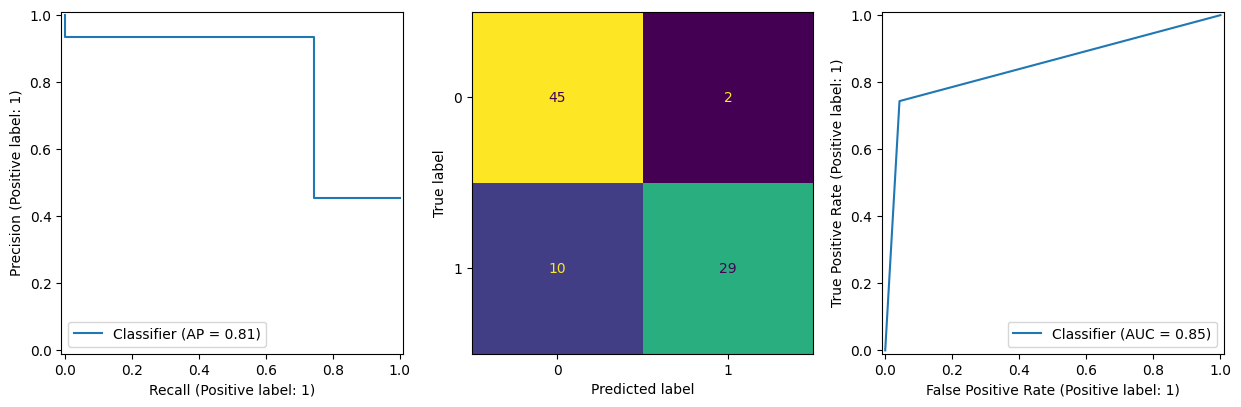

In [126]:
run_test_model(forest_model,forest_param_grid)

In [144]:
final_forest_param_grid = {'max_depth':np.arange(3,8),
                           'max_features':['log2'],
                           'min_samples_leaf':np.arange(25,40),
                           'min_samples_split':[5,6,7,8,9,10],
                           'n_estimators':[50]}

In [145]:
final_model = GridSearchCV(forest_model,final_forest_param_grid,n_jobs=-1)

In [146]:
final_model.fit(sc_X_tr,y_tr)

C:\Nowy folder\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([3, 4, 5, 6, 7]),
                         'max_features': ['log2'],
                         'min_samples_leaf': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),
                         'min_samples_split': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [50]})

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        58
           1       0.89      0.89      0.89        27

    accuracy                           0.93        85
   macro avg       0.92      0.92      0.92        85
weighted avg       0.93      0.93      0.93        85



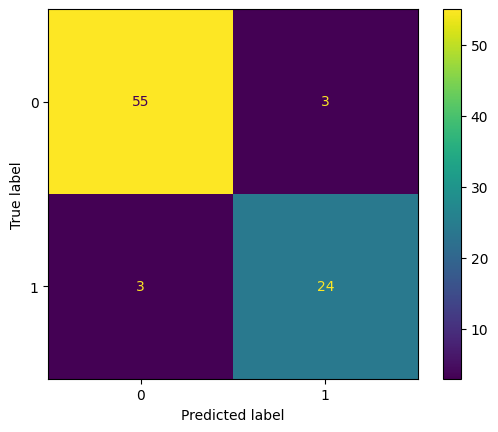

In [147]:
preds=final_model.predict(sc_X_eval)
ConfusionMatrixDisplay.from_predictions(y_eval,preds)
print(classification_report(y_eval,preds))

# Ada boost classifier

In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [135]:
ab_param_grid = {'estimator__criterion' : ["gini", "entropy"],
              'estimator__splitter' :   ["best", "random"],
              'n_estimators': [50,100,200],
              'learning_rate':[0.01,0.1,0.5,1]}

In [136]:
DTC = DecisionTreeClassifier(random_state = 101, max_features = "sqrt",max_depth = 2,class_weight='balanced')

In [142]:
abc_model = AdaBoostClassifier(estimator=DTC)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Nowy folder\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.90      0.90      0.90        39

    accuracy                           0.91        86
   macro avg       0.91      0.91      0.91        86
weighted avg       0.91      0.91      0.91        86

{'estimator__criterion': 'entropy', 'estimator__splitter': 'random', 'learning_rate': 0.1, 'n_estimators': 100}


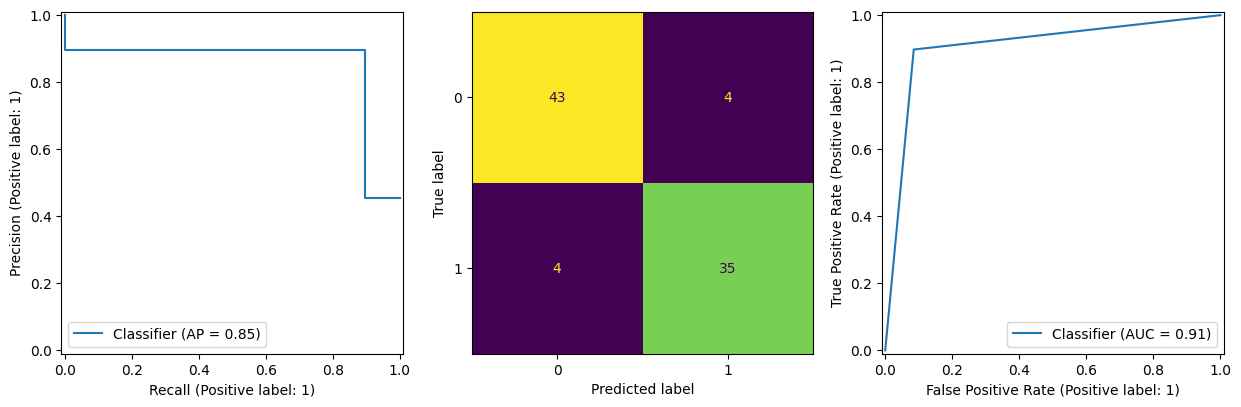

In [143]:
run_test_model(abc_model,ab_param_grid)

In [152]:
abc_tuned_params = {'estimator__criterion' : ["entropy"],
              'estimator__splitter' :   ["random"],
              'n_estimators': np.arange(100,150,2),
              'learning_rate':np.linspace(0.1,0.5,10)}

In [155]:
adb_tunning = GridSearchCV(abc_model,abc_tuned_params,n_jobs=-1,verbose=2,scoring='roc_auc')

In [157]:
adb_tunning.fit(sc_X_tr,y_tr)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Nowy folder\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                           max_depth=2,
                                                                           max_features='sqrt',
                                                                           random_state=101)),
             n_jobs=-1,
             param_grid={'estimator__criterion': ['entropy'],
                         'estimator__splitter': ['random'],
                         'learning_rate': array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ]),
                         'n_estimators': array([100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124,
       126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148])},
             scoring='roc_auc', verbose=2)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        47
           1       0.92      0.85      0.88        39

    accuracy                           0.90        86
   macro avg       0.90      0.89      0.89        86
weighted avg       0.90      0.90      0.89        86



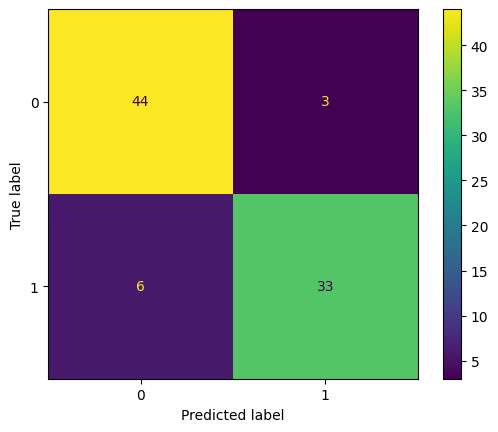

In [166]:
y_preds=adb_tunning.best_estimator_.predict(sc_X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)
print(classification_report(y_test,y_preds))

better result on first grid search Final model 

In [ ]:
{'estimator__criterion': 'entropy', 'estimator__splitter': 'random', 'learning_rate': 0.1, 'n_estimators': 100}

In [167]:
DTC = DecisionTreeClassifier(criterion='entropy',splitter='random')
ABC = AdaBoostClassifier(DTC,n_estimators=100,learning_rate=0.1)

In [169]:
X_train_full = np.concatenate((sc_X_tr, sc_X_test), axis=0)
y_train_full = np.concatenate((y_tr, y_test), axis=0)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.90      0.96      0.93        27

    accuracy                           0.95        85
   macro avg       0.94      0.96      0.95        85
weighted avg       0.95      0.95      0.95        85



C:\Nowy folder\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


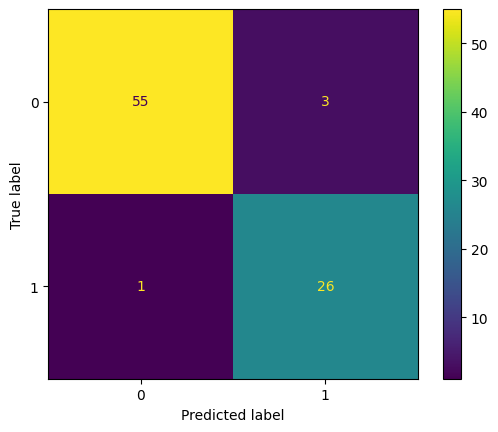

In [172]:
ABC.fit(X_train_full,y_train_full)
final_preds=ABC.predict(sc_X_eval)
ConfusionMatrixDisplay.from_predictions(y_eval,final_preds)
print(classification_report(y_eval,final_preds))

In [ ]:
feat_imps=pd.DataFrame(data=ABC.feature_importances_,index=X.columns,columns=['Feature_importance']).sort_values(by='Feature_importance',ascending=False)

Text(0.5, 0, '')

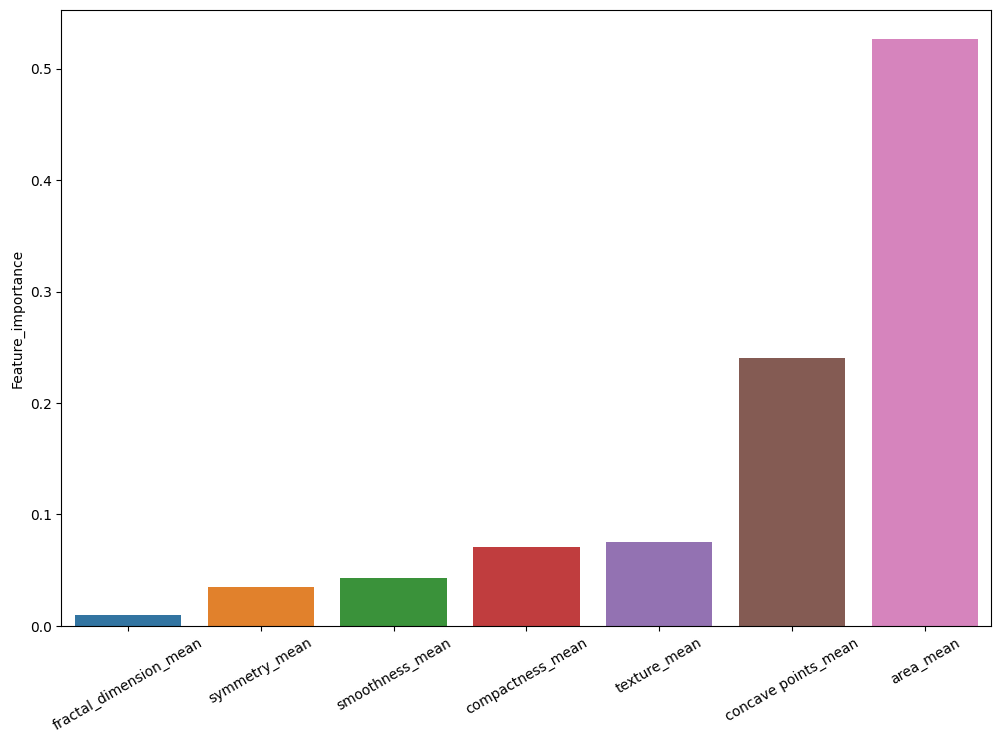

In [197]:
plt.figure(figsize=(12,8))
sns.barplot(data=feat_imps,x=feat_imps.index,y='Feature_importance',
           hue=feat_imps.index)
plt.xticks(rotation=30)
plt.xlabel('')

In [198]:
X

,texture_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871
1,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667
2,21.25,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999
3,20.38,386.1,0.14250,0.28390,0.10520,0.2597,0.09744
4,14.34,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.13890,0.1726,0.05623
565,28.25,1261.0,0.09780,0.10340,0.09791,0.1752,0.05533
566,28.08,858.1,0.08455,0.10230,0.05302,0.1590,0.05648
567,29.33,1265.0,0.11780,0.27700,0.15200,0.2397,0.07016


In [177]:
import joblib

In [175]:
sc_X=scaler.fit_transform(X)

In [176]:
ABC.fit(X,y)

C:\Nowy folder\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    splitter='random'),
                   learning_rate=0.1, n_estimators=100)

In [180]:
joblib.dump(ABC,'cancer_classification_model.pkl')

['cancer_classification_model.pkl']